This chapter details fundamentals of spatial data analysis and Vector data analysis.

In [1]:
# importing the modules
from glob import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import earthpy as et
import geopandas as gpd
from shapely.geometry import Point

sns.set(font_scale=1.0, style='white')
%matplotlib inline

In [2]:
# importing tree locations from the spatial vector data
df_tree = gpd.read_file('C:/Users/Juliance/Desktop/Earth_DS/spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_plot_centroids.shp')
df_tree.head()

,Plot_ID,Point,northing,easting,plot_type,geometry
0,SJER1068,center,4111567.818,255852.376,trees,POINT (255852.376 4111567.818)
1,SJER112,center,4111298.971,257406.967,trees,POINT (257406.967 4111298.971)
2,SJER116,center,4110819.876,256838.760,grass,POINT (256838.760 4110819.876)
3,SJER117,center,4108752.026,256176.947,trees,POINT (256176.947 4108752.026)
4,SJER120,center,4110476.079,255968.372,grass,POINT (255968.372 4110476.079)


In [3]:
# viewing the geometry of the dataset
df_tree.geom_type

0     Point
1     Point
2     Point
3     Point
4     Point
5     Point
6     Point
7     Point
8     Point
9     Point
10    Point
11    Point
12    Point
13    Point
14    Point
15    Point
16    Point
17    Point
dtype: object

In [4]:
# viewing the CRS of the object
df_tree.crs

<Derived Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 120°W and 114°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Alberta; British Columbia (BC); Northwest Territories (NWT); Nunavut. Mexico. United States (USA).
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
# viewing the spatial extent of the data
# this shows the furthest extent to the data in all four corners
df_tree.total_bounds

array([ 254738.618, 4107527.074,  258497.102, 4112167.778])

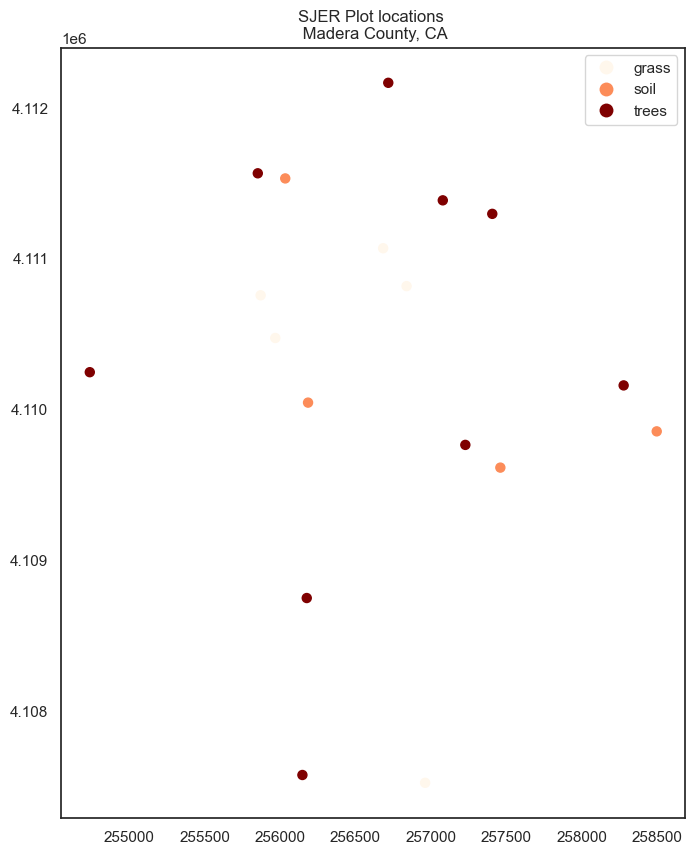

In [20]:
# plotting the shapefile
fig, ax = plt.subplots(figsize=(10,10))

df_tree.plot(
    column='plot_type',
    categorical=True,
    legend=True,
    markersize=42,
    cmap="OrRd",
    ax=ax
)
ax.set(title='SJER Plot locations \n Madera County, CA')
plt.show()

In [21]:
# reading an additional file 
crop_extent = gpd.read_file('C:/Users/Juliance/Desktop/Earth_DS/spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_crop.shp')
crop_extent.head()

,Id,geometry
0,0,"POLYGON ((254570.567 4112361.920, 258867.409 4..."


Text(0.5, 1.0, 'Spatial plot of SJER plot locations layered on top of the plot boundary.\n Madera County, CA')

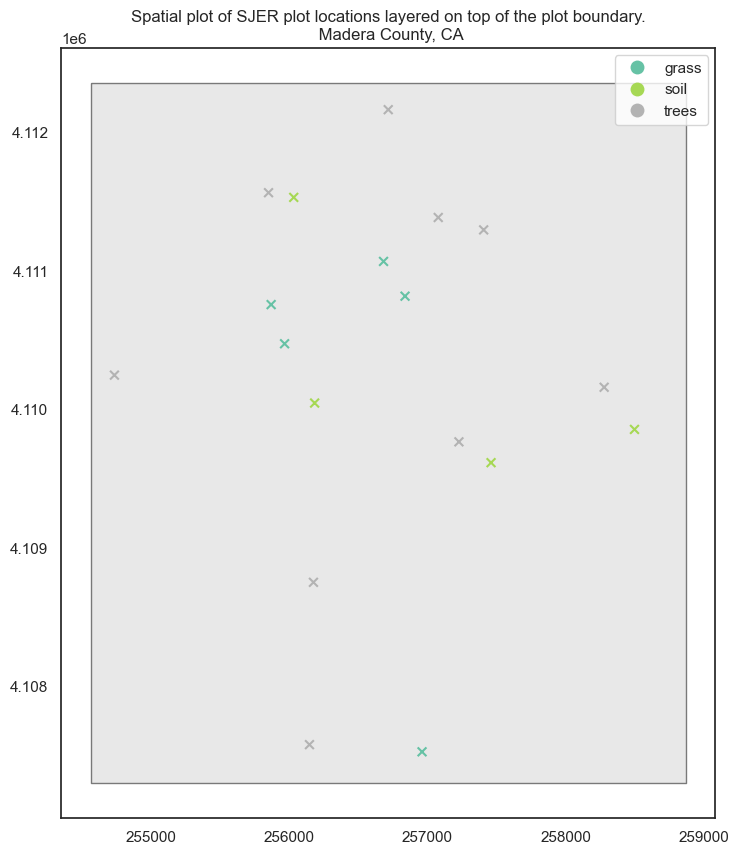

In [24]:
# creating a combined plot

fig, ax = plt.subplots(figsize=(10,10))

# creating the polygon as the base layer
crop_extent.plot(
    color='lightgrey',
    edgecolor='black',
    alpha=.5,
    ax=ax
)

# adding another layer using same axes
df_tree.plot(
    column='plot_type',
    marker = "x",
    markersize=40,
    cmap='Set2',
    legend=True,
    ax=ax
)
plt.title('Spatial plot of SJER plot locations layered on top of the plot boundary.\n Madera County, CA')

Geographic vs Projected coordinate reference systems

In [3]:
# plotting the coordinates for boulder colorado on a map using coordinates (476911.31,  4429455.35)
boulder_df = np.array([[476911.31,  4429455.35]])
geometry = [Point(xy) for xy in boulder_df]

boulder_loc = gpd.GeoDataFrame(
    geometry,
    columns = ['geometry'],
    crs={'init':'epsg:2957'}
)

c:\Users\Juliance\Desktop\Earth_DS\.venv\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


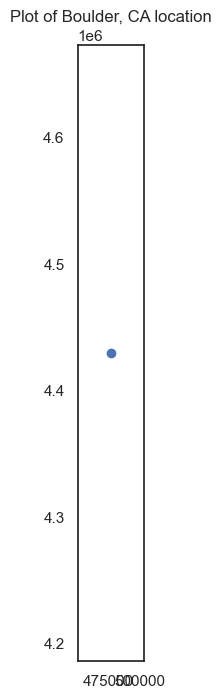

In [4]:
fig, ax = plt.subplots(figsize=(8,8))
boulder_loc.plot(ax=ax)
ax.set_title("Plot of Boulder, CA location")

plt.show()

In [5]:
# view crs
boulder_loc.crs

<Derived Projected CRS: EPSG:2957>
Name: NAD83(CSRS) / UTM zone 13N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada between 108°W and 102°W onshore and offshore - Northwest Territories, Nunavut, Saskatchewan.
- bounds: (-108.0, 48.99, -102.0, 84.0)
Coordinate Operation:
- name: UTM zone 13N
- method: Transverse Mercator
Datum: NAD83 Canadian Spatial Reference System
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [6]:
# when the same location is projected into a geographic coordinate system, the coordinates change
# one is cartesian axis while the geographical one is on an ellipsoidal axis.
boulder_geo = boulder_loc.to_crs(epsg=4326)
boulder_geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
world = gpd.read_file('C:/Users/Juliance/Desktop/Earth_DS/spatial-vector-lidar/global/ne_110m_land/ne_110m_land.shp')
world

,featurecla,scalerank,geometry
0,Country,1,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Country,1,"POLYGON ((-159.20818 -79.49706, -161.12760 -79..."
2,Country,1,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,Country,1,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,Country,1,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."
...,...,...,...
122,Country,1,"POLYGON ((51.13619 80.54728, 49.79368 80.41543..."
123,Country,1,"POLYGON ((99.93976 78.88094, 97.75794 78.75620..."
124,Country,1,"POLYGON ((-87.02000 79.66000, -85.81435 79.336..."
125,Country,1,"POLYGON ((-68.50000 83.10632, -65.82735 83.028..."


Text(0.5, 1.0, 'World Map with Boulder, CO location.\n Geographic WGS84 CRS ')

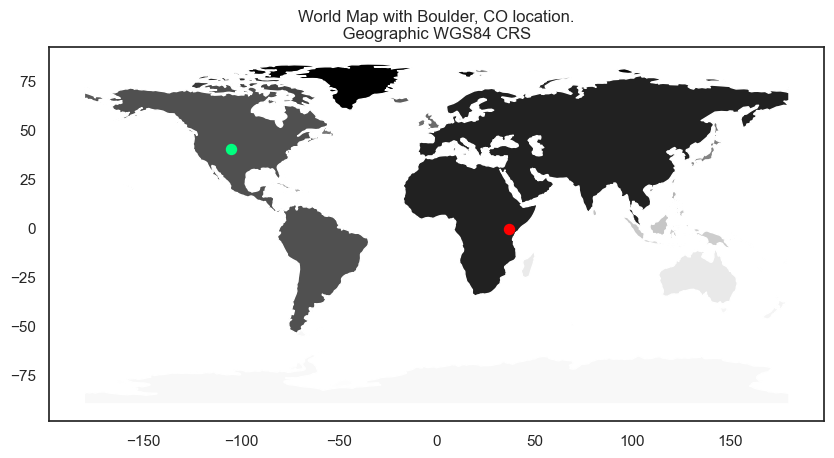

In [33]:
# plotting the point on a geographical CRS
fig,ax = plt.subplots(figsize=(10,8))
world.plot(cmap='Greys', ax=ax)

# plot the point on the Geo CRS
boulder_geo.plot(ax=ax, markersize = 52, color='springgreen')

plt.title('World Map with Boulder, CO location.\n Geographic WGS84 CRS ')

Understand EPSG, WKT & Other CRS Definition Styles